## Final Project Submission
* Student name: BELLA SOMWE
* Student pace: full time
* Scheduled project review date/time: 20/11/2011
* Instructor name: MARK TIBA

# PROJECT 1 : MICROSOFT MOVIE STUDIOS

### INTRODUCTION
In this project expectations are to explore what types of films are currently doing the best at the box office, translate those findings into actionable insights that the head of Microsoft's new movie studio can use to help decide what type of films to create.
### OBJECTIVES:
 - Extract data from the datasets provided
 - Analyze extracted data carefully and accurately
 - Generate visualizations of the analysis
 - Come up with reccommendations upon iterpreting visualizations.

## THE TASK: ANALYZE TOP MOVIES BY GENRE
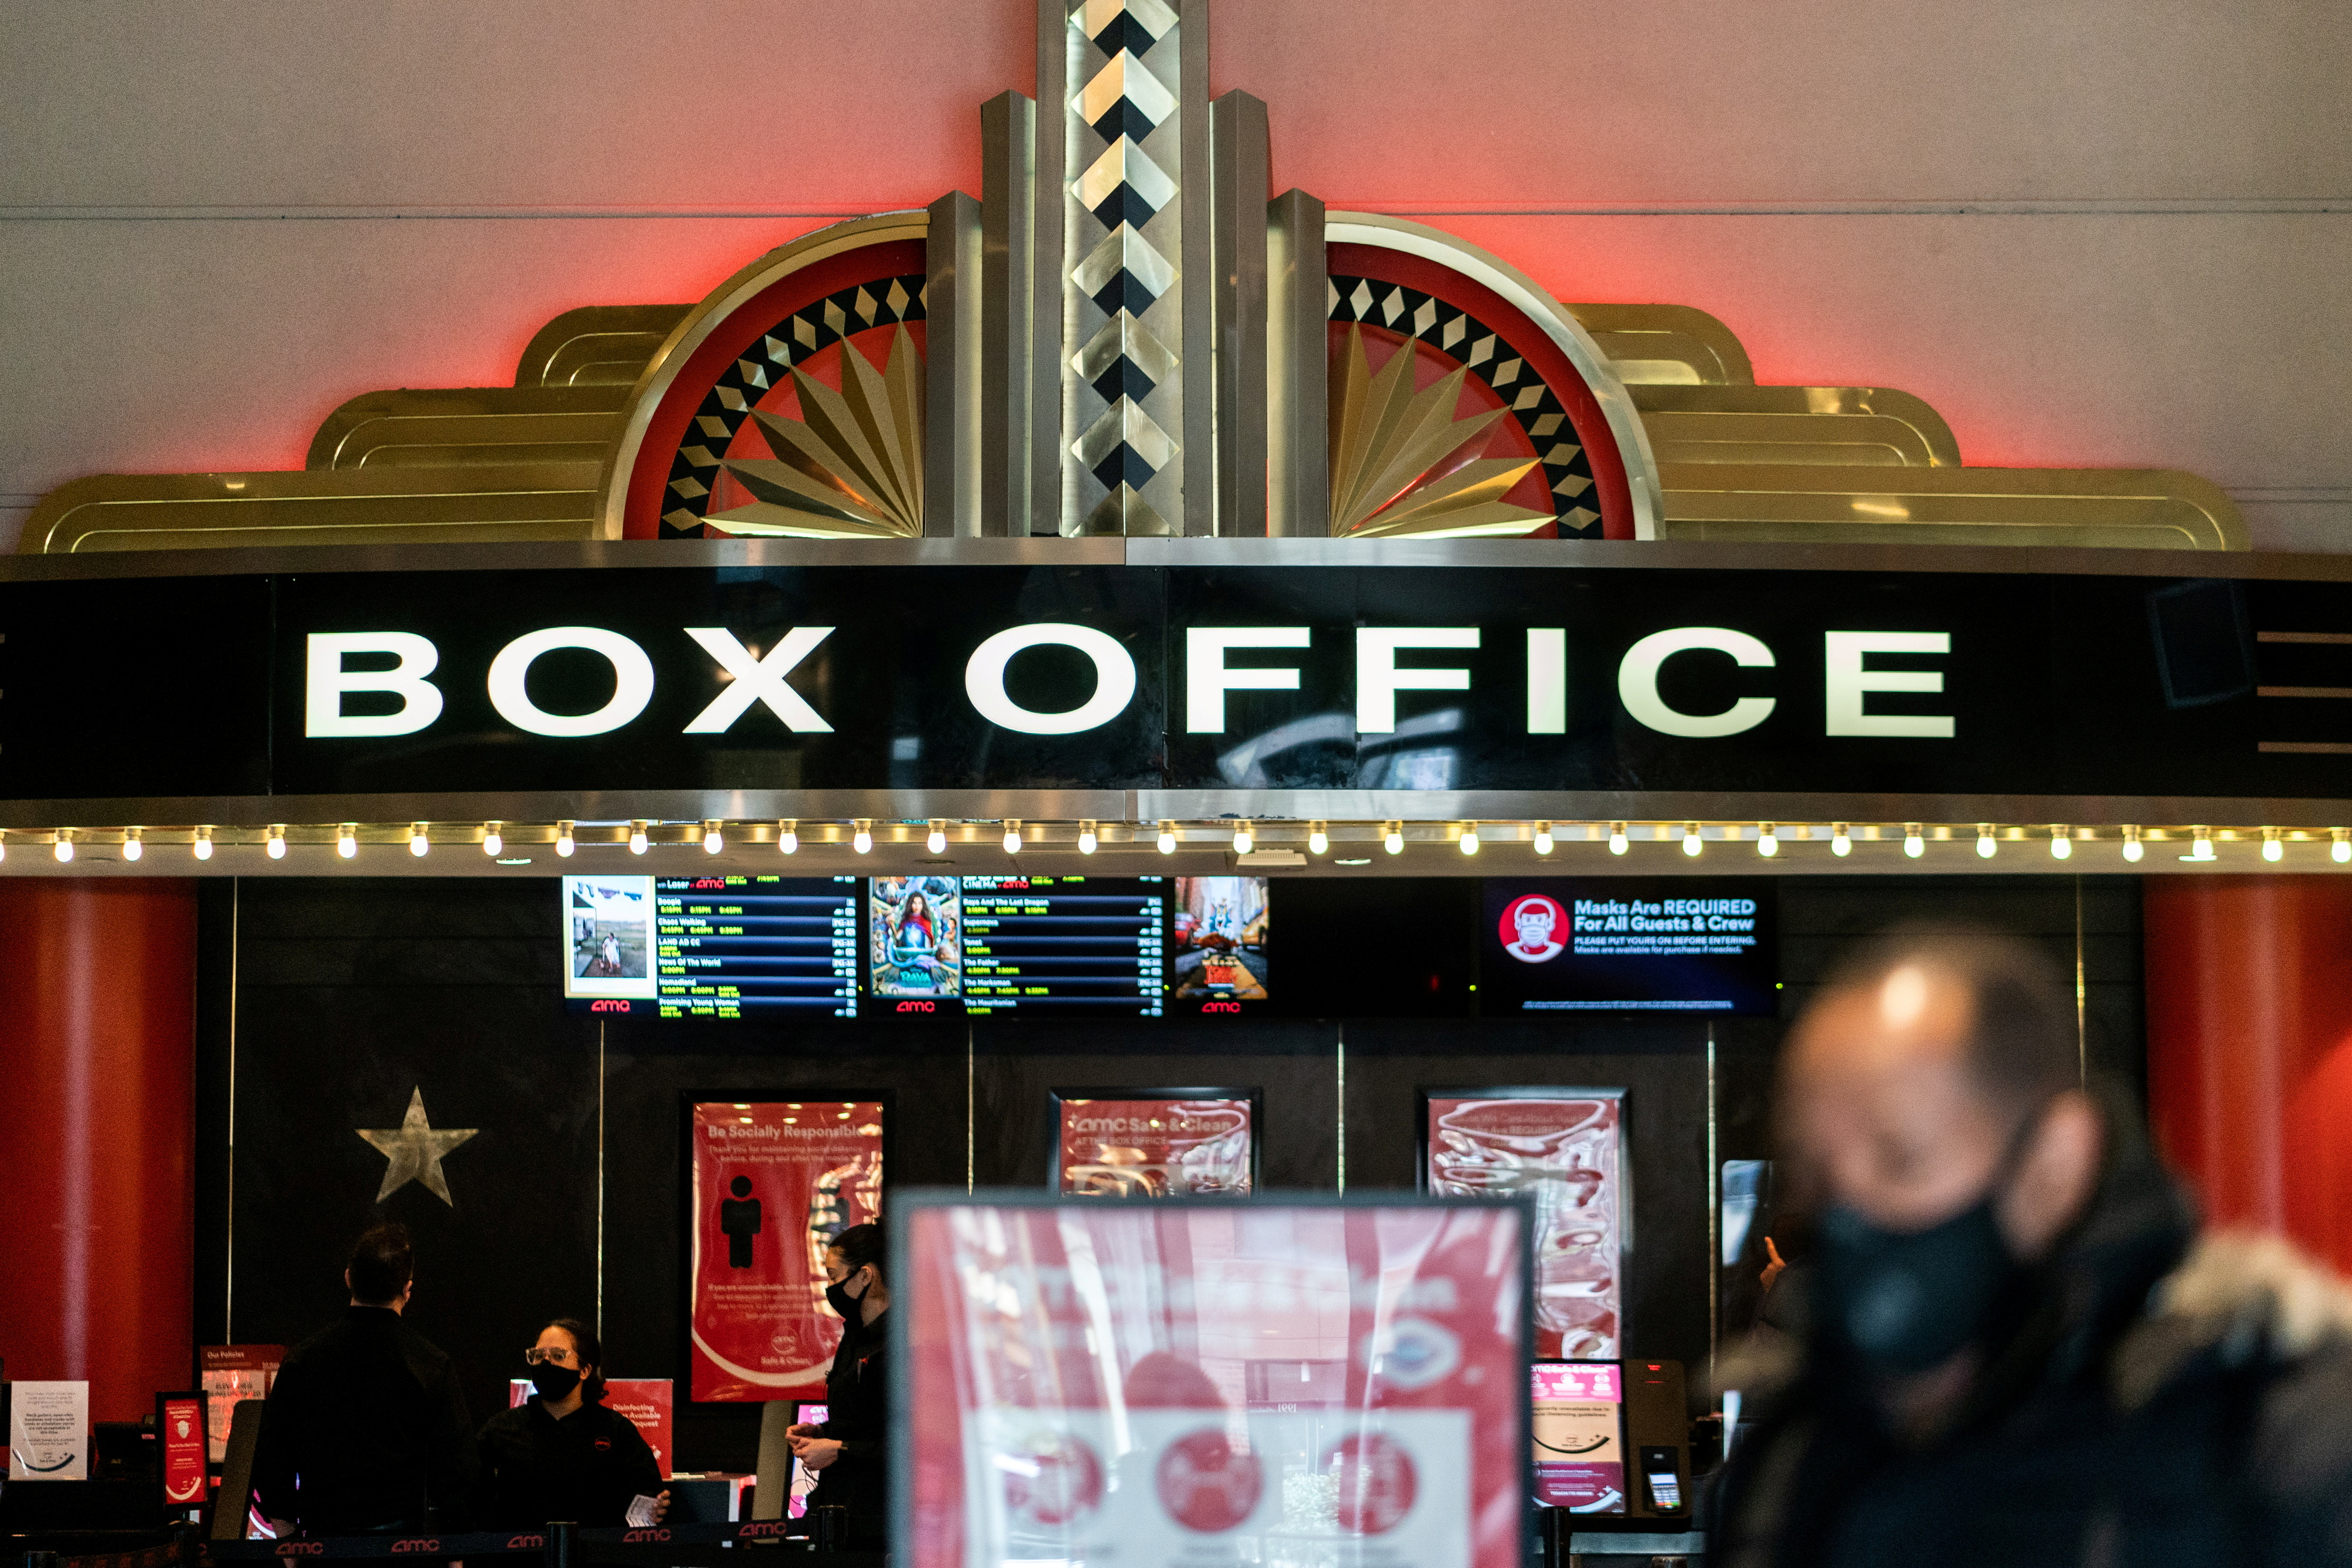

## BUSINESS UNDERSTANDING

#### What are the top rated movies to produce?
##### What is the problem?
Microsoft sees all the big companies creating original video content and they want to get in on the fun. They have decided to create a new movie studio, but they don’t know anything about creating movies. You are charged with exploring what types of films are currently doing the best at the box office. You must then translate those findings into actionable insights that the head of Microsoft's new movie studio can use to help decide what type of films to create.

## DATA UNDERSTANDING
The data sources for this analysis will be pulled from files in the data folder
The folder contains:
#### -  im.db:
A database from imdb  whose tables is represented by the ERD diagram below:
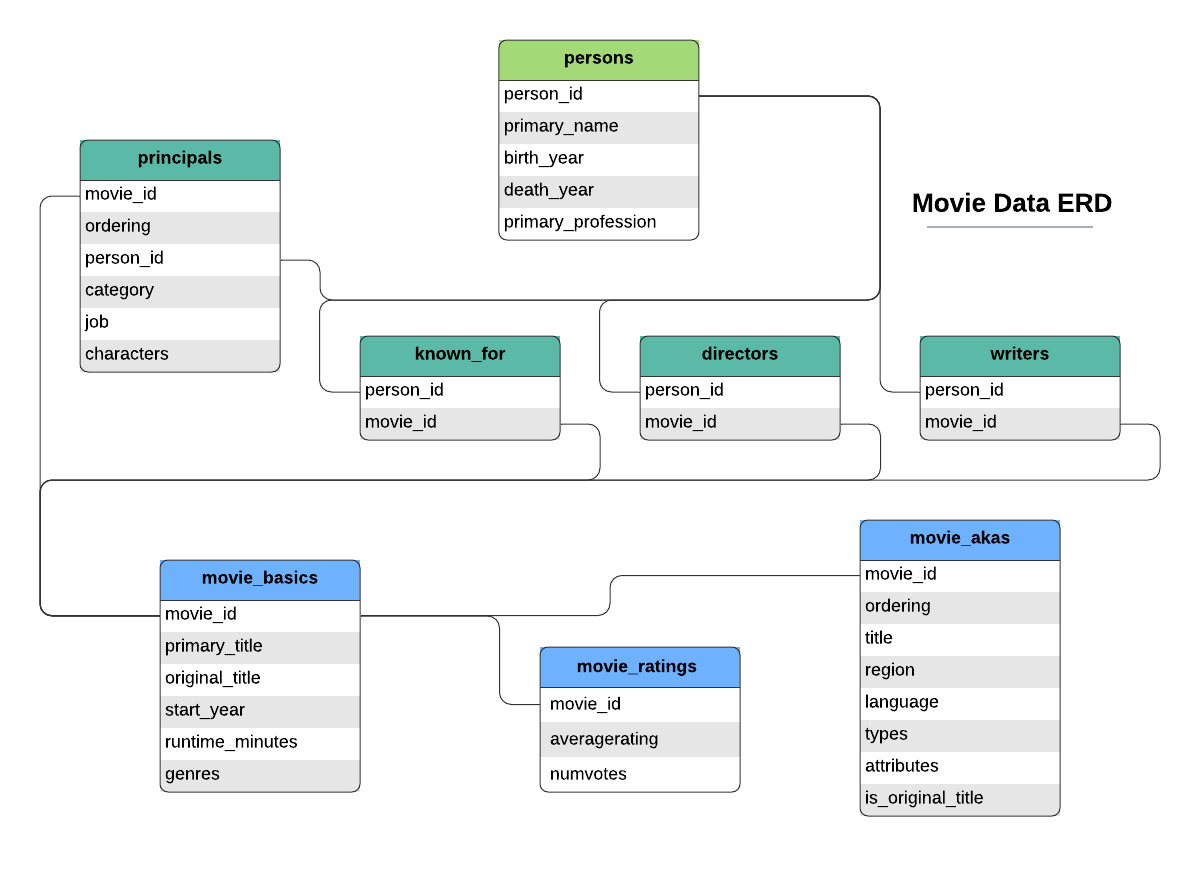
 
 #### - bom.movies.csv:
 A csv file containing movies alongside domestic and foreign gross profit
 
 #### - tmdb.movies.csv:
 A csv file containing movies with emphasis on movie popularity.
 
 #### - tn.movie_budgets.csv:
 A csv file containing movies alongside their budgets.

## GETTING THE DATA
Below we import the necessary packages for extracting data stores in the files in a python friendly structure that is easy for analysis and statistics. 

In [273]:
import pandas as pd
import csv
import sqlite3
import matplotlib.pyplot as plt
%matplotlib inline

## Let us begin with the sql database:

In [274]:
# connect to database
conn = sqlite3.connect('data/im.db')

## Now we display our tables of intrest from our datbase using pandas

In [275]:
#displaying movie_ratings table
mr = pd.read_sql("""
SELECT * FROM movie_ratings
;
""", conn)
mr

movie_id  averagerating  numvotes
0      tt10356526            8.3        31
1      tt10384606            8.9       559
2       tt1042974            6.4        20
3       tt1043726            4.2     50352
4       tt1060240            6.5        21
...           ...            ...       ...
73851   tt9805820            8.1        25
73852   tt9844256            7.5        24
73853   tt9851050            4.7        14
73854   tt9886934            7.0         5
73855   tt9894098            6.3       128

[73856 rows x 3 columns]

In [276]:
#Sorting the data to identify most voted movie id.
mr.sort_values(by=['numvotes'], ascending=False)

movie_id  averagerating  numvotes
63498  tt1375666            8.8   1841066
8738   tt1345836            8.4   1387769
24920  tt0816692            8.6   1299334
38058  tt1853728            8.4   1211405
48221  tt0848228            8.1   1183655
...          ...            ...       ...
39180  tt8050582            8.0         5
33886  tt6449270            4.0         5
22243  tt3819584            7.6         5
49605  tt2136926            5.8         5
32411  tt2056595            8.8         5

[73856 rows x 3 columns]

The data above does not give us much but the movie id of the movie that got most votes which means alot of people love that kind of film. That id will come in handy later to itentify most voted movie.

In [26]:
# Get information about the dataframe
mr.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 73856 entries, 0 to 73855
Data columns (total 3 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   movie_id       73856 non-null  object 
 1   averagerating  73856 non-null  float64
 2   numvotes       73856 non-null  int64  
dtypes: float64(1), int64(1), object(1)
memory usage: 1.7+ MB


This tells us there are no missing values in movie_ratings table

In [27]:
# Finding highest rating
mr.sort_values(by=['averagerating'], ascending=False)

movie_id  averagerating  numvotes
27644  tt8730716           10.0         5
8992   tt1770682           10.0         5
26153  tt2632430           10.0         5
65033  tt9715646           10.0        20
57679  tt5344358           10.0         6
...          ...            ...       ...
50971  tt6017238            1.0        21
32440  tt2087999            1.0         7
36456  tt1896768            1.0        21
54856  tt1976600            1.0       436
39248  tt8654080            1.0        21

[73856 rows x 3 columns]

In [28]:
# Displaying movie_basics
mb = pd.read_sql("""
SELECT * FROM movie_basics
;
""", conn)
mb

movie_id                                primary_title  \
0       tt0063540                                    Sunghursh   
1       tt0066787              One Day Before the Rainy Season   
2       tt0069049                   The Other Side of the Wind   
3       tt0069204                              Sabse Bada Sukh   
4       tt0100275                     The Wandering Soap Opera   
...           ...                                          ...   
146139  tt9916538                          Kuambil Lagi Hatiku   
146140  tt9916622  Rodolpho Teóphilo - O Legado de um Pioneiro   
146141  tt9916706                              Dankyavar Danka   
146142  tt9916730                                       6 Gunn   
146143  tt9916754               Chico Albuquerque - Revelações   

                                     original_title  start_year  \
0                                         Sunghursh        2013   
1                                   Ashad Ka Ek Din        2019   
2                        The Other Side of the Wind        2018   
3                                   Sabse Bada Sukh        2018   
4                             La Telenovela Errante        2017   
...                                             ...         ...   
146139                          Kuambil Lagi Hatiku        2019   
146140  Rodolpho Teóphilo - O Legado de um Pioneiro        2015   
146141                              Dankyavar Danka        2013   
146142                                       6 Gunn        2017   
146143               Chico Albuquerque - Revelações        2013   

        runtime_minutes                genres  
0                 175.0    Action,Crime,Drama  
1                 114.0       Biography,Drama  
2                 122.0                 Drama  
3                   NaN          Comedy,Drama  
4                  80.0  Comedy,Drama,Fantasy  
...                 ...                   ...  
146139            123.0                 Drama  
146140              NaN           Documentary  
146141              NaN                Comedy  
146142            116.0                  None  
146143              NaN           Documentary  

[146144 rows x 6 columns]

In [29]:
# Get information about the dataframe
mb.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 146144 entries, 0 to 146143
Data columns (total 6 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   movie_id         146144 non-null  object 
 1   primary_title    146144 non-null  object 
 2   original_title   146123 non-null  object 
 3   start_year       146144 non-null  int64  
 4   runtime_minutes  114405 non-null  float64
 5   genres           140736 non-null  object 
dtypes: float64(1), int64(1), object(4)
memory usage: 6.7+ MB


This tells us we have missing values on two columns namely runtime minutes and genres. As we are interested in genres and do not want to drop that column, we will simply assume 'None' is unkown . We may also need to join these tables so as to group ratings by genre.

In [30]:
# joining the two tables
jn = """
SELECT * FROM movie_ratings
LEFT JOIN movie_basics
    USING(movie_id)
;
"""
joined_df = pd.read_sql(jn , conn)
joined_df

movie_id  averagerating  numvotes  \
0      tt10356526            8.3        31   
1      tt10384606            8.9       559   
2       tt1042974            6.4        20   
3       tt1043726            4.2     50352   
4       tt1060240            6.5        21   
...           ...            ...       ...   
73851   tt9805820            8.1        25   
73852   tt9844256            7.5        24   
73853   tt9851050            4.7        14   
73854   tt9886934            7.0         5   
73855   tt9894098            6.3       128   

                                           primary_title  \
0                                       Laiye Je Yaarian   
1                                             Borderless   
2                                              Just Inès   
3                                 The Legend of Hercules   
4                                              Até Onde?   
...                                                  ...   
73851                                              Caisa   
73852  Code Geass: Lelouch of the Rebellion - Glorifi...   
73853                                            Sisters   
73854                                  The Projectionist   
73855                                             Sathru   

                                         original_title  start_year  \
0                                      Laiye Je Yaarian        2019   
1                                            Borderless        2019   
2                                             Just Inès        2010   
3                                The Legend of Hercules        2014   
4                                             Até Onde?        2011   
...                                                 ...         ...   
73851                                             Caisa        2018   
73852  Code Geass: Lelouch of the Rebellion Episode III        2018   
73853                                           Sisters        2019   
73854                                 The Projectionist        2019   
73855                                            Sathru        2019   

       runtime_minutes                    genres  
0                117.0                   Romance  
1                 87.0               Documentary  
2                 90.0                     Drama  
3                 99.0  Action,Adventure,Fantasy  
4                 73.0          Mystery,Thriller  
...                ...                       ...  
73851             84.0               Documentary  
73852            120.0   Action,Animation,Sci-Fi  
73853              NaN              Action,Drama  
73854             81.0               Documentary  
73855            129.0                  Thriller  

[73856 rows x 8 columns]

In [160]:
joined_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 73856 entries, 0 to 73855
Data columns (total 8 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   movie_id         73856 non-null  object 
 1   averagerating    73856 non-null  float64
 2   numvotes         73856 non-null  int64  
 3   primary_title    73856 non-null  object 
 4   original_title   73856 non-null  object 
 5   start_year       73856 non-null  int64  
 6   runtime_minutes  66236 non-null  float64
 7   genres           73052 non-null  object 
dtypes: float64(2), int64(2), object(4)
memory usage: 4.5+ MB


Missing values present. We should drop them.

In [198]:
# Drop missing values
joined_df = joined_df.dropna()

In [199]:
# Sorting with reference to the average rating in descending order.
rating = joined_df.sort_values(by = ['averagerating'], ascending = False)
rating.head(10)

movie_id  averagerating  numvotes  \
45335   tt6991826           10.0         5   
49073   tt5089804           10.0         7   
59761   tt4109192           10.0         6   
34334   tt4960818           10.0         8   
56819  tt10378660           10.0         5   
27644   tt8730716           10.0         5   
7017    tt6295832           10.0         5   
52178   tt7259300           10.0         6   
26153   tt2632430           10.0         5   
8992    tt1770682           10.0         5   

                                         primary_title  \
45335  A Dedicated Life: Phoebe Brand Beyond the Group   
49073                  Fly High: Story of the Disc Dog   
59761                            I Was Born Yesterday!   
34334                                  Revolution Food   
56819        The Dark Knight: The Ballad of the N Word   
27644                    Pick It Up! - Ska in the '90s   
7017                             Requiem voor een Boom   
52178                                   Calamity Kevin   
26153                            Hercule contre Hermès   
8992                              Freeing Bernie Baran   

                                        original_title  start_year  \
45335  A Dedicated Life: Phoebe Brand Beyond the Group        2015   
49073                  Fly High: Story of the Disc Dog        2019   
59761                            I Was Born Yesterday!        2015   
34334                                  Revolution Food        2015   
56819        The Dark Knight: The Ballad of the N Word        2018   
27644                    Pick It Up! - Ska in the '90s        2019   
7017                             Requiem voor een Boom        2016   
52178                                   Calamity Kevin        2019   
26153                            Hercule contre Hermès        2012   
8992                              Freeing Bernie Baran        2010   

       runtime_minutes             genres  
45335             93.0        Documentary  
49073             65.0        Documentary  
59761             31.0        Documentary  
34334             70.0        Documentary  
56819            129.0       Comedy,Drama  
27644             99.0        Documentary  
7017              48.0        Documentary  
52178             77.0   Adventure,Comedy  
26153             72.0        Documentary  
8992             100.0  Crime,Documentary

This shows us that the Documentary genre is among the highest rated films which is an indicator that alot of people like this type of film and it is doing very well.

In [200]:
rating.tail(10)

movie_id  averagerating  numvotes                       primary_title  \
19289  tt3709556            1.0         6  Tôkyô Densetsu: Yuganda Ikei Toshi   
21174  tt8426154            1.0         5                          Pup Scouts   
36456  tt1896768            1.0        21                     Kikkake wa You!   
36633  tt2124890            1.0       439                           Ramo Trip   
1301   tt1611056            1.0       449                      Hito no sabaku   
28439  tt4713440            1.0       235            The Tokyo Wind Orchestra   
66138  tt7831076            1.0        96                         Yes, Sir! 7   
22204  tt3717376            1.0         6                     A Time to Speak   
22817  tt6021902            1.0       230                      Death Forest 4   
15185  tt6010140            1.0       230       Desu foresuto kyofu no mori 5   

                           original_title  start_year  runtime_minutes  \
19289  Tôkyô Densetsu: Yuganda Ikei Toshi        2014             66.0   
21174                          Pup Scouts        2018             72.0   
36456                     Kikkake wa You!        2011             75.0   
36633                           Ramo Trip        2012            119.0   
1301                       Hito no sabaku        2010            121.0   
28439            The Tokyo Wind Orchestra        2016             75.0   
66138                         Yes, Sir! 7        2016            111.0   
22204                     A Time to Speak        2014             60.0   
22817                      Death Forest 4        2016             70.0   
15185       Desu foresuto kyofu no mori 5        2016             65.0   

             genres  
19289        Horror  
21174     Animation  
36456   Drama,Music  
36633   Documentary  
1301          Drama  
28439         Drama  
66138  Comedy,Drama  
22204   Documentary  
22817        Horror  
15185        Horror

This shows us that the horror and drama genres are not doing very well hence the low ratings.

In [201]:
# Sorting with reference to the number of votes in descending order.
rating2 = joined_df.sort_values(by = ['numvotes'], ascending = False)
rating2.head(10)

movie_id  averagerating  numvotes            primary_title  \
63498  tt1375666            8.8   1841066                Inception   
8738   tt1345836            8.4   1387769    The Dark Knight Rises   
24920  tt0816692            8.6   1299334             Interstellar   
38058  tt1853728            8.4   1211405         Django Unchained   
48221  tt0848228            8.1   1183655             The Avengers   
39356  tt0993846            8.2   1035358  The Wolf of Wall Street   
3140   tt1130884            8.1   1005960           Shutter Island   
25777  tt2015381            8.1    948394  Guardians of the Galaxy   
60518  tt1431045            8.0    820847                 Deadpool   
63506  tt1392170            7.2    795227         The Hunger Games   

                original_title  start_year  runtime_minutes  \
63498                Inception        2010            148.0   
8738     The Dark Knight Rises        2012            164.0   
24920             Interstellar        2014            169.0   
38058         Django Unchained        2012            165.0   
48221             The Avengers        2012            143.0   
39356  The Wolf of Wall Street        2013            180.0   
3140            Shutter Island        2010            138.0   
25777  Guardians of the Galaxy        2014            121.0   
60518                 Deadpool        2016            108.0   
63506         The Hunger Games        2012            142.0   

                        genres  
63498  Action,Adventure,Sci-Fi  
8738           Action,Thriller  
24920   Adventure,Drama,Sci-Fi  
38058            Drama,Western  
48221  Action,Adventure,Sci-Fi  
39356    Biography,Crime,Drama  
3140          Mystery,Thriller  
25777  Action,Adventure,Comedy  
60518  Action,Adventure,Comedy  
63506  Action,Adventure,Sci-Fi

This shows that action,adventure,sci-fi movies are the most voted even though they may not have the highest rating. We would expect to see documentary since it is most rated but documentary genre is absent. The fact that people voted makes this dataset a more valuable source of what reflects what the market wants.

In [202]:
rating2.tail(10)

movie_id  averagerating  numvotes  \
29210  tt2302591            7.4         5   
9604   tt5655422            8.0         5   
29222  tt2316389            5.8         5   
15304  tt0276568            7.4         5   
64343  tt5330830            8.6         5   
62598  tt2435488            5.0         5   
60412  tt6467114            7.6         5   
20876  tt3624544            7.0         5   
37389  tt7222980            7.4         5   
52367  tt8852046            7.0         5   

                                     primary_title  \
29210                                El Cap Report   
9604                            Tables of Istanbul   
29222  Ai no ejiki: Onna kyôshi Haruka no kokuhaku   
15304                           To Chase a Million   
64343                                          Ann   
62598                                  Possessions   
60412                                       Jingga   
20876                                    Art Party   
37389                           Congo, My Precious   
52367                                  The Meeting   

                                    original_title  start_year  \
29210                                El Cap Report        2012   
9604                            Tables of Istanbul        2016   
29222  Ai no ejiki: Onna kyôshi Haruka no kokuhaku        2010   
15304                           To Chase a Million        2018   
64343                                          Ann        2016   
62598                                  Possessions        2013   
60412                                       Jingga        2016   
20876                                    Art Party        2014   
37389                           Congo, My Precious        2017   
52367                                  The Meeting        2018   

       runtime_minutes                       genres  
29210             58.0  Adventure,Documentary,Sport  
9604              59.0                  Documentary  
29222             71.0                       Horror  
15304             97.0                 Action,Drama  
64343             79.0                        Drama  
62598             92.0         Action,Drama,Western  
60412            102.0                        Drama  
20876             83.0                        Drama  
37389             52.0                  Documentary  
52367             96.0                        Drama

Thos shows the least voted genres. The documentary genre appears twice despite being highly rated. This is an indicator that even though documentaries are highly rated, few people watch them.

In [250]:
# Identifying top 5 genre count 
jr = """
SELECT genres, COUNT(genres) as genre_count
FROM movie_basics
GROUP BY genres
ORDER BY genre_count DESC;
"""
top_5_genre = pd.read_sql(jr, conn).head(5)
top_5_genre

genres  genre_count
0   Documentary        32185
1         Drama        21486
2        Comedy         9177
3        Horror         4372
4  Comedy,Drama         3519

This tells us the 'Documentary' market among others is saturated having the most number of films in the dataset thus it may be very competitive to produce films in these genres but since documentaries are among the highest rated it may be a good idea to focus on them as an option but better to focus much effort on what the people voted which is Action,Adventure,Sci-Fi.

In [251]:
# Identifying the bottom 10 genre count
bottom_5_genre = pd.read_sql(jr, conn).tail(5)
bottom_5_genre

genres  genre_count
1081      Action,Animation,History            1
1082  Action,Animation,Documentary            1
1083    Action,Animation,Biography            1
1084      Action,Adventure,Musical            1
1085                          None            0

This shows us a number of genres that do not have a lot of saturation in the market thus may prove to be a good market since competition is low but more analysis is needed.

 ## Next we start on the CSV files

##### Since we imported CSV at the begginning we only need to open and load the csv file into a dataframe.

In [205]:
bom_movie_file = open('data/bom.movie_gross.csv')
reader1 = csv.DictReader(bom_movie_file)
bom_data = list(reader1)
bom_movie_file.close()

In [206]:
# Preview the data
bom_data

[{'title': 'Toy Story 3',
  'studio': 'BV',
  'domestic_gross': '415000000.0',
  'foreign_gross': '652000000',
  'year': '2010'},
 {'title': 'Alice in Wonderland (2010)',
  'studio': 'BV',
  'domestic_gross': '334200000.0',
  'foreign_gross': '691300000',
  'year': '2010'},
 {'title': 'Harry Potter and the Deathly Hallows Part 1',
  'studio': 'WB',
  'domestic_gross': '296000000.0',
  'foreign_gross': '664300000',
  'year': '2010'},
 {'title': 'Inception',
  'studio': 'WB',
  'domestic_gross': '292600000.0',
  'foreign_gross': '535700000',
  'year': '2010'},
 {'title': 'Shrek Forever After',
  'studio': 'P/DW',
  'domestic_gross': '238700000.0',
  'foreign_gross': '513900000',
  'year': '2010'},
 {'title': 'The Twilight Saga: Eclipse',
  'studio': 'Sum.',
  'domestic_gross': '300500000.0',
  'foreign_gross': '398000000',
  'year': '2010'},
 {'title': 'Iron Man 2',
  'studio': 'Par.',
  'domestic_gross': '312400000.0',
  'foreign_gross': '311500000',
  'year': '2010'},
 {'title': 'Tangl

In [207]:
# convert data into a dataframe
bom_data_df = pd.DataFrame(bom_data)
bom_data_df

title      studio domestic_gross  \
0                                     Toy Story 3          BV    415000000.0   
1                      Alice in Wonderland (2010)          BV    334200000.0   
2     Harry Potter and the Deathly Hallows Part 1          WB    296000000.0   
3                                       Inception          WB    292600000.0   
4                             Shrek Forever After        P/DW    238700000.0   
...                                           ...         ...            ...   
3382                                    The Quake       Magn.         6200.0   
3383                  Edward II (2018 re-release)          FM         4800.0   
3384                                     El Pacto        Sony         2500.0   
3385                                     The Swan  Synergetic         2400.0   
3386                            An Actor Prepares       Grav.         1700.0   

     foreign_gross  year  
0        652000000  2010  
1        691300000  2010  
2        664300000  2010  
3        535700000  2010  
4        513900000  2010  
...            ...   ...  
3382                2018  
3383                2018  
3384                2018  
3385                2018  
3386                2018  

[3387 rows x 5 columns]

In [208]:
# Check for missing values.
bom_data_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3387 entries, 0 to 3386
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   title           3387 non-null   object
 1   studio          3387 non-null   object
 2   domestic_gross  3387 non-null   object
 3   foreign_gross   3387 non-null   object
 4   year            3387 non-null   object
dtypes: object(5)
memory usage: 132.4+ KB


This shows no missing data for the bom_data dataframe.

In [209]:
# Generate pivot table to identify number of movies per studio
gk = bom_data_df.pivot_table(index=['studio'], aggfunc='size', fill_value=0)
gk

studio
          5
3D        1
A23       2
A24      49
ADC       2
         ..
XL        2
YFG       1
Yash     14
Zee       1
Zeit.    16
Length: 258, dtype: int64

In [263]:
# Sort the studios to get top ten studios with highest movies.
sorted_gk = gk.sort_values(ascending=False)
sorted_gk.head(10)

studio
IFC      166
Uni.     147
WB       140
Fox      136
Magn.    136
SPC      123
Sony     110
BV       106
LGF      103
Par.     101
dtype: int64

This shows the top most perfoming studios.

In [211]:
# Sort the studios to get bottom ten studios with lowest number of movies
sorted_gk.tail(10)

studio
ELS          1
Spanglish    1
EXCL         1
PalT         1
PalUni       1
Saban        1
KS           1
SMod         1
FEF          1
FInd.        1
dtype: int64

This shows the least perfoming studios.

In [212]:
tmdb_movie_file = open('data/tmdb.movies.csv',  encoding='utf8')
reader2 = csv.DictReader(tmdb_movie_file)
tmdb_data = list(reader2)
tmdb_movie_file.close()

In [213]:
tmdb_data

[{'': '0',
  'genre_ids': '[12, 14, 10751]',
  'id': '12444',
  'original_language': 'en',
  'original_title': 'Harry Potter and the Deathly Hallows: Part 1',
  'popularity': '33.533',
  'release_date': '2010-11-19',
  'title': 'Harry Potter and the Deathly Hallows: Part 1',
  'vote_average': '7.7',
  'vote_count': '10788'},
 {'': '1',
  'genre_ids': '[14, 12, 16, 10751]',
  'id': '10191',
  'original_language': 'en',
  'original_title': 'How to Train Your Dragon',
  'popularity': '28.734',
  'release_date': '2010-03-26',
  'title': 'How to Train Your Dragon',
  'vote_average': '7.7',
  'vote_count': '7610'},
 {'': '2',
  'genre_ids': '[12, 28, 878]',
  'id': '10138',
  'original_language': 'en',
  'original_title': 'Iron Man 2',
  'popularity': '28.515',
  'release_date': '2010-05-07',
  'title': 'Iron Man 2',
  'vote_average': '6.8',
  'vote_count': '12368'},
 {'': '3',
  'genre_ids': '[16, 35, 10751]',
  'id': '862',
  'original_language': 'en',
  'original_title': 'Toy Story',
  'p

In [214]:
# convert data into a dataframe
tmdb_data_df = pd.DataFrame(tmdb_data)
tmdb_data_df

genre_ids      id original_language  \
0          0      [12, 14, 10751]   12444                en   
1          1  [14, 12, 16, 10751]   10191                en   
2          2        [12, 28, 878]   10138                en   
3          3      [16, 35, 10751]     862                en   
4          4        [28, 878, 12]   27205                en   
...      ...                  ...     ...               ...   
26512  26512             [27, 18]  488143                en   
26513  26513             [18, 53]  485975                en   
26514  26514         [14, 28, 12]  381231                en   
26515  26515      [10751, 12, 28]  366854                en   
26516  26516             [53, 27]  309885                en   

                                     original_title popularity release_date  \
0      Harry Potter and the Deathly Hallows: Part 1     33.533   2010-11-19   
1                          How to Train Your Dragon     28.734   2010-03-26   
2                                        Iron Man 2     28.515   2010-05-07   
3                                         Toy Story     28.005   1995-11-22   
4                                         Inception      27.92   2010-07-16   
...                                             ...        ...          ...   
26512                         Laboratory Conditions        0.6   2018-10-13   
26513                               _EXHIBIT_84xxx_        0.6   2018-05-01   
26514                                  The Last One        0.6   2018-10-01   
26515                                  Trailer Made        0.6   2018-06-22   
26516                                    The Church        0.6   2018-10-05   

                                              title vote_average vote_count  
0      Harry Potter and the Deathly Hallows: Part 1          7.7      10788  
1                          How to Train Your Dragon          7.7       7610  
2                                        Iron Man 2          6.8      12368  
3                                         Toy Story          7.9      10174  
4                                         Inception          8.3      22186  
...                                             ...          ...        ...  
26512                         Laboratory Conditions          0.0          1  
26513                               _EXHIBIT_84xxx_          0.0          1  
26514                                  The Last One          0.0          1  
26515                                  Trailer Made          0.0          1  
26516                                    The Church          0.0          1  

[26517 rows x 10 columns]

We realise that the first column repeats itself. Let us drop it.

In [215]:
# Drop the first column
tmdb_data_df.drop(columns = tmdb_data_df.columns[0], axis = 1, inplace = True)

In [216]:
tmdb_data_df

genre_ids      id original_language  \
0          [12, 14, 10751]   12444                en   
1      [14, 12, 16, 10751]   10191                en   
2            [12, 28, 878]   10138                en   
3          [16, 35, 10751]     862                en   
4            [28, 878, 12]   27205                en   
...                    ...     ...               ...   
26512             [27, 18]  488143                en   
26513             [18, 53]  485975                en   
26514         [14, 28, 12]  381231                en   
26515      [10751, 12, 28]  366854                en   
26516             [53, 27]  309885                en   

                                     original_title popularity release_date  \
0      Harry Potter and the Deathly Hallows: Part 1     33.533   2010-11-19   
1                          How to Train Your Dragon     28.734   2010-03-26   
2                                        Iron Man 2     28.515   2010-05-07   
3                                         Toy Story     28.005   1995-11-22   
4                                         Inception      27.92   2010-07-16   
...                                             ...        ...          ...   
26512                         Laboratory Conditions        0.6   2018-10-13   
26513                               _EXHIBIT_84xxx_        0.6   2018-05-01   
26514                                  The Last One        0.6   2018-10-01   
26515                                  Trailer Made        0.6   2018-06-22   
26516                                    The Church        0.6   2018-10-05   

                                              title vote_average vote_count  
0      Harry Potter and the Deathly Hallows: Part 1          7.7      10788  
1                          How to Train Your Dragon          7.7       7610  
2                                        Iron Man 2          6.8      12368  
3                                         Toy Story          7.9      10174  
4                                         Inception          8.3      22186  
...                                             ...          ...        ...  
26512                         Laboratory Conditions          0.0          1  
26513                               _EXHIBIT_84xxx_          0.0          1  
26514                                  The Last One          0.0          1  
26515                                  Trailer Made          0.0          1  
26516                                    The Church          0.0          1  

[26517 rows x 9 columns]

In [217]:
# Check for missing values
tmdb_data_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26517 entries, 0 to 26516
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   genre_ids          26517 non-null  object
 1   id                 26517 non-null  object
 2   original_language  26517 non-null  object
 3   original_title     26517 non-null  object
 4   popularity         26517 non-null  object
 5   release_date       26517 non-null  object
 6   title              26517 non-null  object
 7   vote_average       26517 non-null  object
 8   vote_count         26517 non-null  object
dtypes: object(9)
memory usage: 1.8+ MB


This shows us there are no missing values in the tmdb dataframe.

In [218]:
# Sort in reference to vote_count
vote_counts = tmdb_data_df.sort_values(by = ['vote_count'], ascending = False)
vote_counts.head(10)

genre_ids      id original_language         original_title  \
17391  [16, 12, 10751, 35]  269149                en               Zootopia   
20794      [18, 14, 10749]  283378                en                 Fallen   
2511              [18, 35]   77338                fr           Intouchables   
2645          [18, 53, 27]   48171                en               The Rite   
85             [10749, 35]   25195                en              Leap Year   
11242          [18, 10749]  226857                en           Endless Love   
14592                 [18]  322740                pt              Beira-Mar   
24301          [35, 10402]  538604                en        The After Party   
18003                 [99]  376261                en                 Weiner   
17937       [18, 27, 9648]  325302                en  They Look Like People   

      popularity release_date                  title vote_average vote_count  
17391     27.549   2016-03-04               Zootopia          7.7       9977  
20794     11.287   2017-09-08                 Fallen          6.0        995  
2511      15.013   2011-11-02       The Intouchables          8.2       9940  
2645       9.676   2011-01-28               The Rite          5.9        994  
85        11.821   2010-01-08              Leap Year          6.7        990  
11242      8.776   2014-02-14           Endless Love          6.8        990  
14592      6.583   2015-06-21               Seashore          6.1         99  
24301      8.226   2018-08-24        The After Party          6.4         99  
18003      5.545   2016-05-20                 Weiner          7.6         99  
17937      6.076   2016-02-26  They Look Like People          6.1         99

In [219]:
movie_budget_file = open('data/tn.movie_budgets.csv', encoding = 'Latin-1')
reader3 = csv.DictReader(movie_budget_file)
budget_data = list(reader3)
movie_budget_file.close()

In [220]:
budget_data

[{'id': '1',
  'release_date': 'Dec 18, 2009',
  'movie': 'Avatar',
  'production_budget': '$425,000,000',
  'domestic_gross': '$760,507,625',
  'worldwide_gross': '$2,776,345,279'},
 {'id': '2',
  'release_date': 'May 20, 2011',
  'movie': 'Pirates of the Caribbean: On Stranger Tides',
  'production_budget': '$410,600,000',
  'domestic_gross': '$241,063,875',
  'worldwide_gross': '$1,045,663,875'},
 {'id': '3',
  'release_date': 'Jun 7, 2019',
  'movie': 'Dark Phoenix',
  'production_budget': '$350,000,000',
  'domestic_gross': '$42,762,350',
  'worldwide_gross': '$149,762,350'},
 {'id': '4',
  'release_date': 'May 1, 2015',
  'movie': 'Avengers: Age of Ultron',
  'production_budget': '$330,600,000',
  'domestic_gross': '$459,005,868',
  'worldwide_gross': '$1,403,013,963'},
 {'id': '5',
  'release_date': 'Dec 15, 2017',
  'movie': 'Star Wars Ep. VIII: The Last Jedi',
  'production_budget': '$317,000,000',
  'domestic_gross': '$620,181,382',
  'worldwide_gross': '$1,316,721,747'},
 {'

In [221]:
budget_data_df = pd.DataFrame(budget_data)
budget_data_df

id  release_date                                        movie  \
0      1  Dec 18, 2009                                       Avatar   
1      2  May 20, 2011  Pirates of the Caribbean: On Stranger Tides   
2      3   Jun 7, 2019                                 Dark Phoenix   
3      4   May 1, 2015                      Avengers: Age of Ultron   
4      5  Dec 15, 2017            Star Wars Ep. VIII: The Last Jedi   
...   ..           ...                                          ...   
5777  78  Dec 31, 2018                                       Red 11   
5778  79   Apr 2, 1999                                    Following   
5779  80  Jul 13, 2005                Return to the Land of Wonders   
5780  81  Sep 29, 2015                         A Plague So Pleasant   
5781  82   Aug 5, 2005                            My Date With Drew   

     production_budget domestic_gross worldwide_gross  
0         $425,000,000   $760,507,625  $2,776,345,279  
1         $410,600,000   $241,063,875  $1,045,663,875  
2         $350,000,000    $42,762,350    $149,762,350  
3         $330,600,000   $459,005,868  $1,403,013,963  
4         $317,000,000   $620,181,382  $1,316,721,747  
...                ...            ...             ...  
5777            $7,000             $0              $0  
5778            $6,000        $48,482        $240,495  
5779            $5,000         $1,338          $1,338  
5780            $1,400             $0              $0  
5781            $1,100       $181,041        $181,041  

[5782 rows x 6 columns]

We realise that the first column repeats itself. Let us drop it.

In [222]:
# Drop the first column
# budget_data_df.drop(columns = budget_data_df.columns[0], axis = 1, inplace = True)
# budget_data_df

In [223]:
# checking missing values
budget_data_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5782 entries, 0 to 5781
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   id                 5782 non-null   object
 1   release_date       5782 non-null   object
 2   movie              5782 non-null   object
 3   production_budget  5782 non-null   object
 4   domestic_gross     5782 non-null   object
 5   worldwide_gross    5782 non-null   object
dtypes: object(6)
memory usage: 271.2+ KB


This shows us there are no missing values in the budget dataframe.

### TOP TEN HIGHEST BUDGET MOVIES

In [224]:
#budget_data_df["production_budget"] = budget_data_df["production_budget"].str.replace(',', '')
#budget_data_df['production_budget'] = budget_data_df['production_budget'].str.replace('$', '')
#budget_data_df["production_budget"] = budget_data_df["production_budget"].astype(int)

In [225]:
tp = budget_data_df.sort_values(by = ['production_budget'], ascending = False)
tp.head(10)

id  release_date                              movie production_budget  \
406    7   Nov 6, 2015                  The Peanuts Movie       $99,000,000   
407    8   Feb 8, 2019  The LEGO Movie 2: The Second Part       $99,000,000   
408    9  Nov 21, 2018                         Robin Hood       $99,000,000   
5326  27   Jun 1, 2007                 And Then Came Love          $989,000   
409   10   May 4, 2001                  The Mummy Returns       $98,000,000   
410   11  Dec 20, 2002                  Gangs of New York       $97,000,000   
411   12  May 19, 2017                    Alien: Covenant       $97,000,000   
5332  33   Mar 3, 2015                    Ask Me Anything          $950,000   
5331  32  Aug 12, 2014                              Jesse          $950,000   
5327  28  Apr 14, 2006                         Hard Candy          $950,000   

     domestic_gross worldwide_gross  
406    $130,178,411    $250,091,610  
407    $105,806,508    $190,325,698  
408     $30,824,628     $84,747,441  
5326         $8,158          $8,158  
409    $202,007,640    $435,040,395  
410     $77,730,500    $183,124,621  
411     $74,262,031    $238,521,247  
5332             $0              $0  
5331             $0              $0  
5327     $1,024,640      $8,267,066

In [226]:
# Bottom 10 movies
tp.tail(10)

id  release_date                                      movie  \
5247  48  Jun 28, 2006               Who Killed the Electric Car?   
5246  47  Sep 29, 2000  The Broken Hearts Club: A Romantic Comedy   
5245  46  Apr 24, 1998                        Two Girls and a Guy   
5244  45  Nov 21, 2001                      Sidewalks of New York   
5243  44   Aug 1, 2008                               Frozen River   
5242  43   Aug 3, 2005                                    Junebug   
5241  42  Oct 21, 2011                   Martha Marcy May Marlene   
5240  41   Jun 6, 2014                              Obvious Child   
5239  40  Aug 21, 1998                       Next Stop Wonderland   
5325  26  Dec 22, 2015                     Por amor en el caserio   

     production_budget domestic_gross worldwide_gross  
5247        $1,000,000     $1,678,874      $1,849,392  
5246        $1,000,000     $1,744,858      $2,022,442  
5245        $1,000,000     $2,057,193      $2,315,026  
5244        $1,000,000     $2,402,459      $3,575,308  
5243        $1,000,000     $2,511,476      $6,030,129  
5242        $1,000,000     $2,678,010      $3,553,253  
5241        $1,000,000     $2,981,038      $5,438,911  
5240        $1,000,000     $3,122,616      $3,324,070  
5239        $1,000,000     $3,395,581      $3,465,703  
5325        $1,000,000             $0              $0

### Let us now load the tsv files as dataframes and have a look into this data:

In [227]:
# reading rt.movie_info.tsv as a dataframe
movie_info_df = pd.read_csv('data/rt.movie_info.tsv', sep='\t')

In [228]:
movie_info_df

id                                           synopsis rating  \
0        1  This gritty, fast-paced, and innovative police...      R   
1        3  New York City, not-too-distant-future: Eric Pa...      R   
2        5  Illeana Douglas delivers a superb performance ...      R   
3        6  Michael Douglas runs afoul of a treacherous su...      R   
4        7                                                NaN     NR   
...    ...                                                ...    ...   
1555  1996  Forget terrorists or hijackers -- there's a ha...      R   
1556  1997  The popular Saturday Night Live sketch was exp...     PG   
1557  1998  Based on a novel by Richard Powell, when the l...      G   
1558  1999  The Sandlot is a coming-of-age story about a g...     PG   
1559  2000  Suspended from the force, Paris cop Hubert is ...      R   

                                                  genre            director  \
0                   Action and Adventure|Classics|Drama    William Friedkin   
1                     Drama|Science Fiction and Fantasy    David Cronenberg   
2                     Drama|Musical and Performing Arts      Allison Anders   
3                            Drama|Mystery and Suspense      Barry Levinson   
4                                         Drama|Romance      Rodney Bennett   
...                                                 ...                 ...   
1555   Action and Adventure|Horror|Mystery and Suspense                 NaN   
1556                 Comedy|Science Fiction and Fantasy        Steve Barron   
1557  Classics|Comedy|Drama|Musical and Performing Arts      Gordon Douglas   
1558    Comedy|Drama|Kids and Family|Sports and Fitness  David Mickey Evans   
1559  Action and Adventure|Art House and Internation...                 NaN   

                                                writer  theater_date  \
0                                       Ernest Tidyman   Oct 9, 1971   
1                         David Cronenberg|Don DeLillo  Aug 17, 2012   
2                                       Allison Anders  Sep 13, 1996   
3                      Paul Attanasio|Michael Crichton   Dec 9, 1994   
4                                         Giles Cooper           NaN   
...                                                ...           ...   
1555                                               NaN  Aug 18, 2006   
1556  Terry Turner|Tom Davis|Dan Aykroyd|Bonnie Turner  Jul 23, 1993   
1557                                               NaN   Jan 1, 1962   
1558                  David Mickey Evans|Robert Gunter   Apr 1, 1993   
1559                                        Luc Besson  Sep 27, 2001   

          dvd_date currency  box_office      runtime             studio  
0     Sep 25, 2001      NaN         NaN  104 minutes                NaN  
1      Jan 1, 2013        $     600,000  108 minutes  Entertainment One  
2     Apr 18, 2000      NaN         NaN  116 minutes                NaN  
3     Aug 27, 1997      NaN         NaN  128 minutes                NaN  
4              NaN      NaN         NaN  200 minutes                NaN  
...            ...      ...         ...          ...                ...  
1555   Jan 2, 2007        $  33,886,034  106 minutes    New Line Cinema  
1556  Apr 17, 2001      NaN         NaN   88 minutes  Paramount Vantage  
1557  May 11, 2004      NaN         NaN  111 minutes                NaN  
1558  Jan 29, 2002      NaN         NaN  101 minutes                NaN  
1559  Feb 11, 2003      NaN         NaN   94 minutes  Columbia Pictures  

[1560 rows x 12 columns]

In [229]:
movie_info_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1560 entries, 0 to 1559
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   id            1560 non-null   int64 
 1   synopsis      1498 non-null   object
 2   rating        1557 non-null   object
 3   genre         1552 non-null   object
 4   director      1361 non-null   object
 5   writer        1111 non-null   object
 6   theater_date  1201 non-null   object
 7   dvd_date      1201 non-null   object
 8   currency      340 non-null    object
 9   box_office    340 non-null    object
 10  runtime       1530 non-null   object
 11  studio        494 non-null    object
dtypes: int64(1), object(11)
memory usage: 146.4+ KB


This dataset has missing values in all columns. We should drop them.

In [230]:
# dropping the null values
movie_info_df.dropna()

id                                           synopsis rating  \
1        3  New York City, not-too-distant-future: Eric Pa...      R   
6       10  Some cast and crew from NBC's highly acclaimed...  PG-13   
7       13  Stewart Kane, an Irishman living in the Austra...      R   
15      22  Two-time Academy Award Winner Kevin Spacey giv...      R   
18      25  From ancient Japan's most enduring tale, the e...  PG-13   
...    ...                                                ...    ...   
1530  1968  This holiday season, acclaimed filmmaker Camer...     PG   
1537  1976  Embrace of the Serpent features the encounter,...     NR   
1541  1980  A band of renegades on the run in outer space ...  PG-13   
1542  1981  Money, Fame and the Knowledge of English. In I...     NR   
1545  1985  A woman who joins the undead against her will ...      R   

                                                  genre             director  \
1                     Drama|Science Fiction and Fantasy     David Cronenberg   
6                                                Comedy          Jake Kasdan   
7                                                 Drama         Ray Lawrence   
15                    Comedy|Drama|Mystery and Suspense  George Hickenlooper   
18    Action and Adventure|Drama|Science Fiction and...     Carl Erik Rinsch   
...                                                 ...                  ...   
1530                                       Comedy|Drama        Cameron Crowe   
1537   Action and Adventure|Art House and International          Ciro Guerra   
1541   Action and Adventure|Science Fiction and Fantasy          Joss Whedon   
1542                                       Comedy|Drama         Gauri Shinde   
1545                        Horror|Mystery and Suspense  Sebastian Gutierrez   

                                    writer  theater_date      dvd_date  \
1             David Cronenberg|Don DeLillo  Aug 17, 2012   Jan 1, 2013   
6                               Mike White  Jan 11, 2002  Jun 18, 2002   
7         Raymond Carver|Beatrix Christian  Apr 27, 2006   Oct 2, 2007   
15                           Norman Snider  Dec 17, 2010   Apr 5, 2011   
18              Chris Morgan|Hossein Amini  Dec 25, 2013   Apr 1, 2014   
...                                    ...           ...           ...   
1530     Aline Brosh McKenna|Cameron Crowe  Dec 23, 2011   Apr 3, 2012   
1537  Ciro Guerra|Jacques Toulemonde Vidal  Feb 17, 2016  Jun 21, 2016   
1541                           Joss Whedon  Sep 30, 2005  Dec 20, 2005   
1542                          Gauri Shinde   Oct 5, 2012  Nov 20, 2012   
1545                   Sebastian Gutierrez   Jun 1, 2007   Oct 9, 2007   

     currency  box_office      runtime                  studio  
1           $     600,000  108 minutes       Entertainment One  
6           $  41,032,915   82 minutes      Paramount Pictures  
7           $     224,114  123 minutes  Sony Pictures Classics  
15          $   1,039,869  108 minutes            ATO Pictures  
18          $  20,518,224  127 minutes      Universal Pictures  
...       ...         ...          ...                     ...  
1530        $  72,700,000  126 minutes        20th Century Fox  
1537        $   1,320,005  123 minutes           Buffalo Films  
1541        $  25,335,935  119 minutes      Universal Pictures  
1542        $   1,416,189  129 minutes      Eros Entertainment  
1545        $      59,371   98 minutes        IDP Distribution  

[235 rows x 12 columns]

In [231]:
# Generate a pivot table to identify movie rating
# Generate pivot table to identify number of movies per studio
mk = movie_info_df.pivot_table(index=['rating'], aggfunc='size', fill_value=0)
mk

rating
G         57
NC17       1
NR       503
PG       240
PG-13    235
R        521
dtype: int64

In [232]:
sorted_mk = mk.sort_values(ascending=False)
sorted_mk.head()

rating
R        521
NR       503
PG       240
PG-13    235
G         57
dtype: int64

This shows movies with the rating restricted have the highest count.

In [233]:
# reading the rt.reviews.tsv as a dataframe
reviews_df = pd.read_fwf('data/rt.reviews.tsv')
reviews_df

id\treview\trating\tfresh\tcritic\ttop_critic\tpublisher\tdate
0      3\tA distinctly gallows take on contemporary f...            
1      3\tIt's an allegory in search of a meaning tha...            
2      3\t... life lived in a bubble in financial dea...            
3      3\t"Continuing along a line introduced in last...            
4      3\t... a perverse twist on neorealism... \t\tf...            
...                                                  ...            
54427  2000\tThe real charm of this trifle is the dea...            
54428  2000\t\t1/5\trotten\tMichael Szymanski\t0\tZap...            
54429  2000\t\t2/5\trotten\tEmanuel Levy\t0\tEmanuelL...            
54430  2000\t\t2.5/5\trotten\tChristopher Null\t0\tFi...            
54431  2000\t\t3/5\tfresh\tNicolas Lacroix\t0\tShowbi...            

[54432 rows x 1 columns]

The tsv file appears not to be that important to our study as no further analysis can be achieved through them as it is only random reviews for the movies.

# VISUALIZATIONS

#### We will use bar charts to answer the question:
What kind of films to make

## TOP 5 RATED GENRES

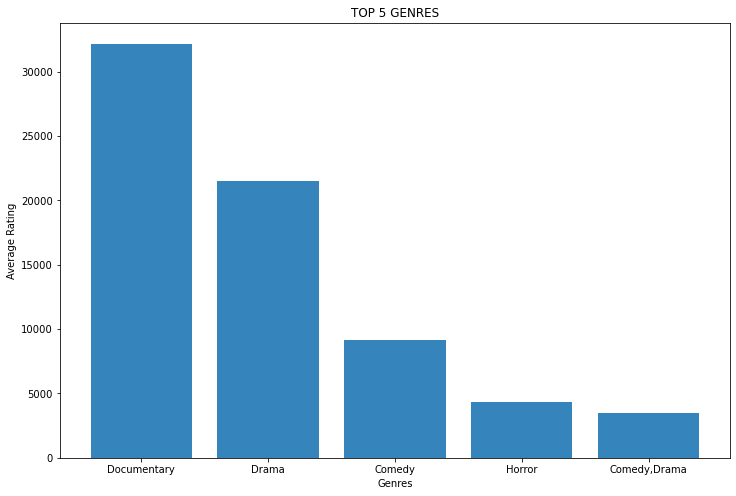

In [249]:
#top rated genres
fig, ax = plt.subplots(figsize = (12,8))
x = top_10_genre['genres']
y = top_10_genre['genre_count']
ax.bar(x,y, alpha = 0.9)
ax.set_title('TOP 5 GENRES')
ax.set_ylabel('Average Rating')
ax.set_xlabel('Genres')
plt.show()

From the above plot, it is clearly visible that documentaries are the highest rated.

## STUDIOS WITH MOST MOVIES

<AxesSubplot:title={'center':'STUDIOS WITH MOST MOVIES'}, xlabel='studio', ylabel='COUNT'>

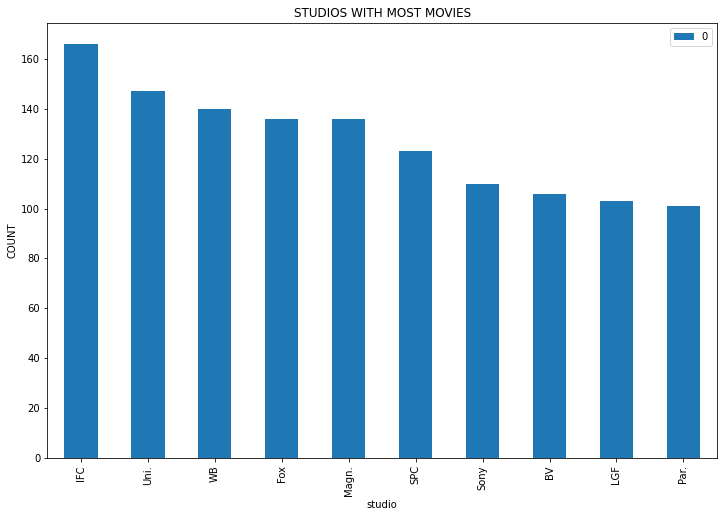

In [271]:
# change the sorted_gk pivot table to a dataframe
sorted_gk_df = pd.DataFrame(sorted_gk)
sorted_gk_df = sorted_gk_df.head(10)
sorted_gk_df.plot(kind = 'bar', figsize = (12,8), title = 'STUDIOS WITH MOST MOVIES', ylabel = 'COUNT')

This plot shows that IFC studio has the most movies on market.

## TOP MOVIE RATINGS TYPES

In [269]:
#change the pivot table to a dataframe
mk_df = pd.DataFrame(sorted_mk)
mk_df

0
rating     
R       521
NR      503
PG      240
PG-13   235
G        57
NC17      1

<AxesSubplot:title={'center':'TOP MOVIE RATINGS TYPES'}, xlabel='rating', ylabel='COUNT'>

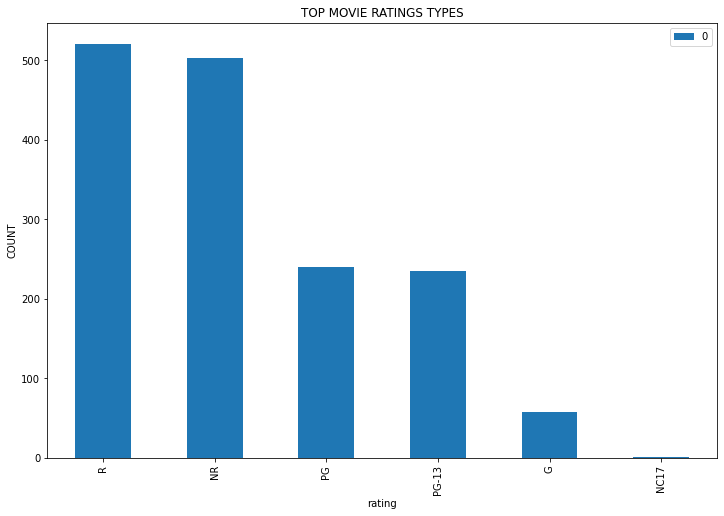

In [272]:
mk_df.plot(kind = 'bar', figsize = (12,8), title = 'TOP MOVIE RATINGS TYPES', ylabel = 'COUNT')

This bar chart shows that restricted(R) types of movies are the highest followed by ones that are not rated(NR)

# RECOMMENDATIONS

### The above study justifies the following reccomendations:
 - Microsoft studio should create documentaries as they are the majority in the market with the highest rating and would be a good starting point.
 - On the long term however, Microsoft studio should focus on action,adventure,sci-fi as it is clearly the most voted meaning alot of people like this kind of content. This means coming up with own superheroes and promoting them as films such as Avatar have the biggest worldwide gross which means alot of profit but at the same time films such as this also have big budgets, so it must be carefully planned.
 - Microsoft should also try to partner with the top studios with the most movies such as IFC, Uni and WB. This will help you grasp information about the film industry and provide a good cache of knowlegde.
 - Microsoft should also focus on movies with ratings type G as they will be viewed by all people and have little saturation in mthe market hence a low on competition. This is due to the fact that majority of viewers of action,adventure,scifi genre can be assumed to be school children.

# CONCLUSIONS

 - The movies with the highest budget have the highest gross profit worldwide.
 - The movies with the highest rating are not necessarily the ones with the most number of votes.
 - Most of the movies produced are rated restricted meaning most of the movies are adult movies.